<a href="https://colab.research.google.com/github/vivithaarumugam/CodeAlpha/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load the dataset
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/train.csv")




In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

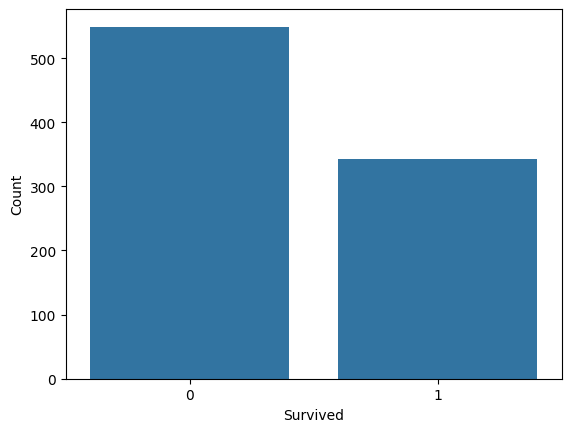

In [10]:
# categorical attributes:

sns.countplot(x='Survived', data=train_df)
plt.ylabel('Count')
plt.show()

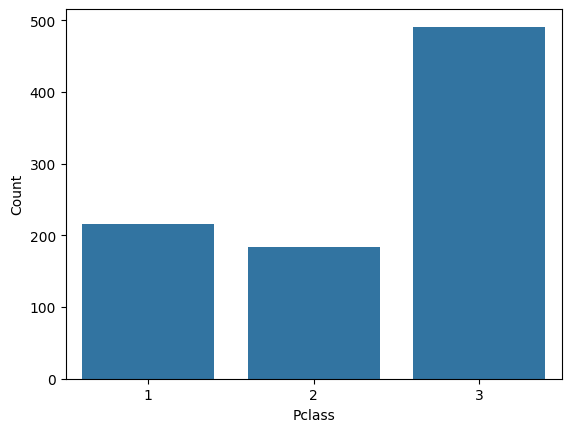

In [11]:
sns.countplot(x='Pclass', data=train_df)
plt.ylabel('Count')
plt.show()

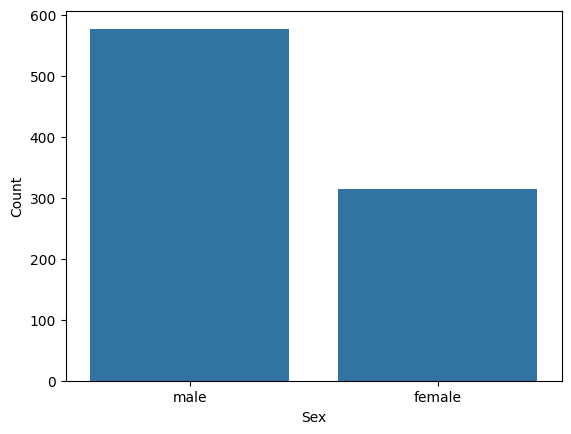

In [12]:
sns.countplot(x='Sex', data=train_df)
plt.ylabel('Count')
plt.show()

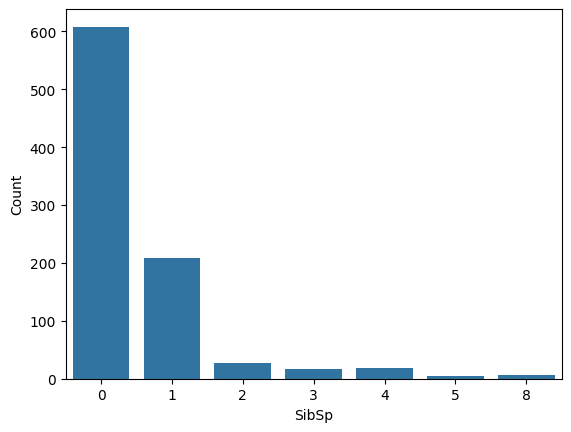

In [13]:
sns.countplot(x='SibSp', data = train_df)
plt.ylabel('Count')
plt.show()

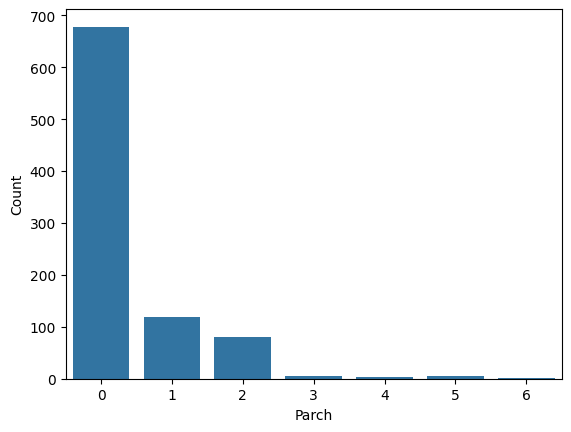

In [14]:
sns.countplot(x='Parch', data = train_df)
plt.ylabel('Count')
plt.show()

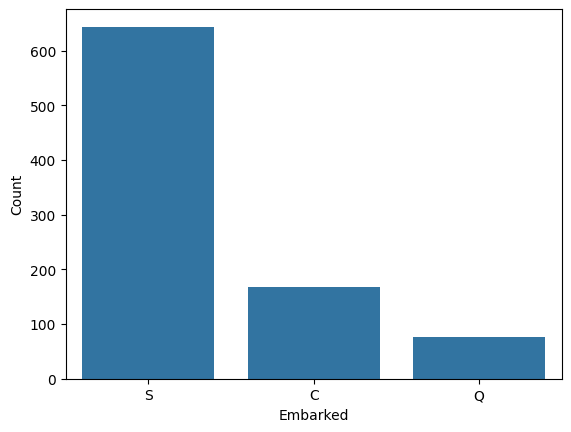

In [15]:
sns.countplot(x='Embarked', data = train_df)
plt.ylabel('Count')
plt.show()

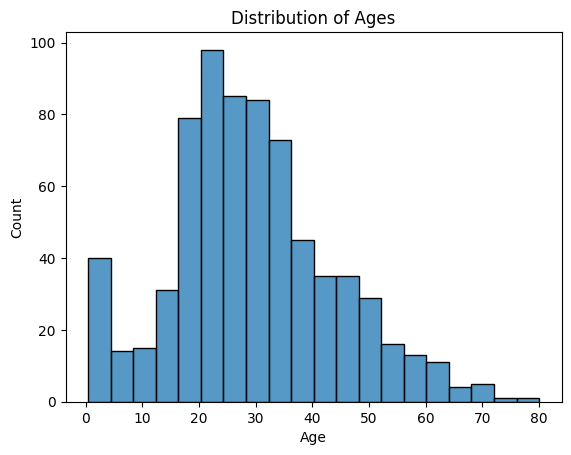

In [16]:
#Numerical Attributes:

sns.histplot(x='Age', data= train_df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

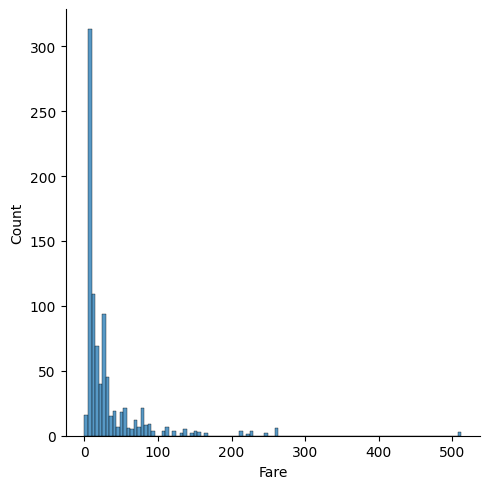

In [17]:
sns.displot(x='Fare', data= train_df)
plt.ylabel('Count')
plt.show()

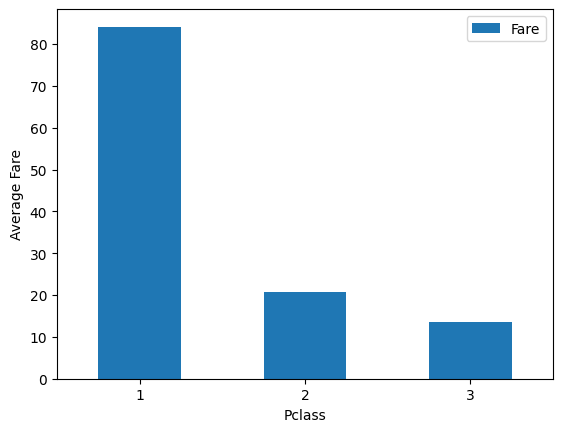

In [18]:
class_fare = train_df.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

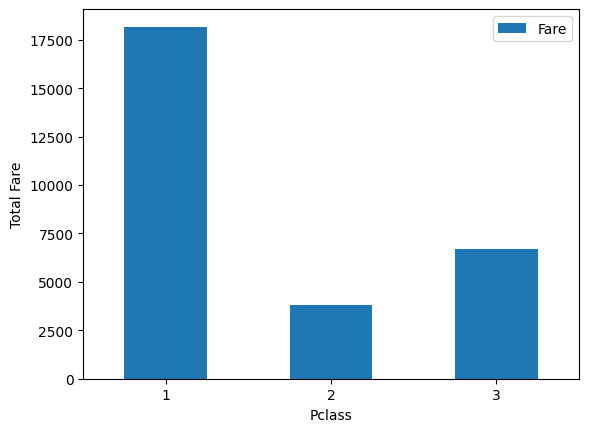

In [19]:
class_fare = train_df.pivot_table(index='Pclass',values='Fare',aggfunc = np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

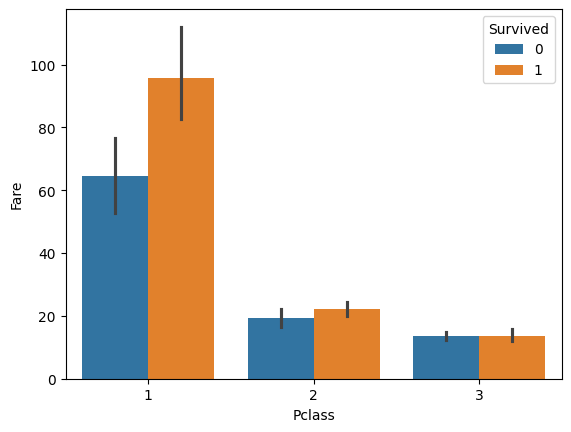

In [20]:
sns.barplot(data=train_df,x='Pclass', y='Fare',hue='Survived')
plt.show()

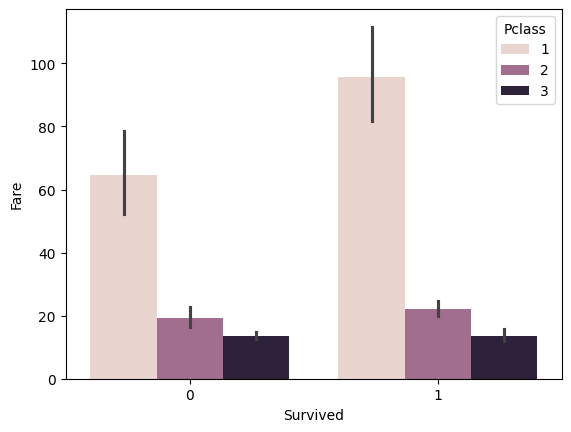

In [21]:
sns.barplot(data = train_df, x='Survived',y='Fare',hue='Pclass')
plt.show()

In [22]:
train_len=len(train_df)
df=pd.concat([train_df, test_df],axis=0)
df=df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
1779,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
1780,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [24]:
df=df.drop(columns=['Cabin'],axis=1)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1777,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
1779,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
1780,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Filling missing values

In [27]:
df['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1777    27.0
1778    19.0
1779     NaN
1780    26.0
1781    32.0
Name: Age, Length: 1782, dtype: float64>

In [28]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [29]:
df['Embarked'].mode()[0]

'S'

In [30]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

# Log transformation for uniform data transmission

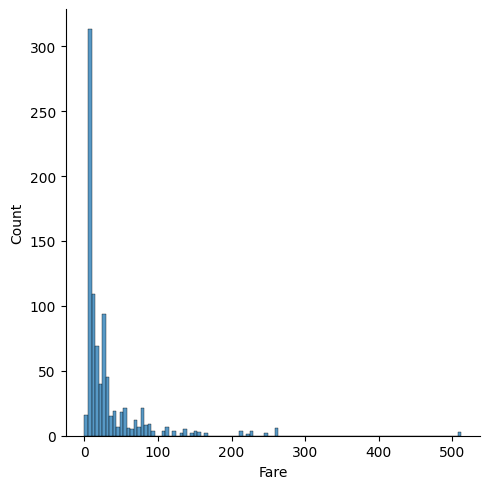

In [31]:
sns.displot(train_df['Fare'])

In [32]:
train_df['Fare']=np.log(train_df['Fare']+1)

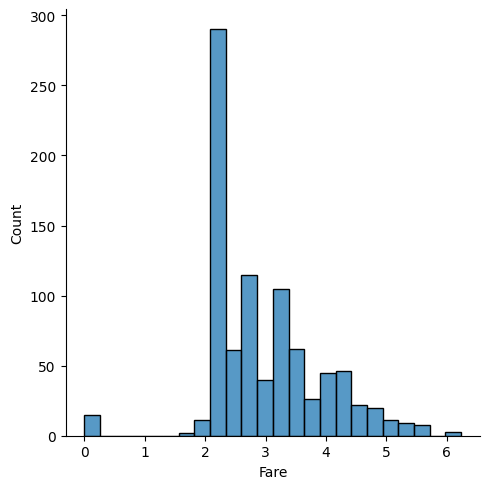

In [33]:
sns.displot(train_df['Fare'])

# correlation matrix

<Axes: >

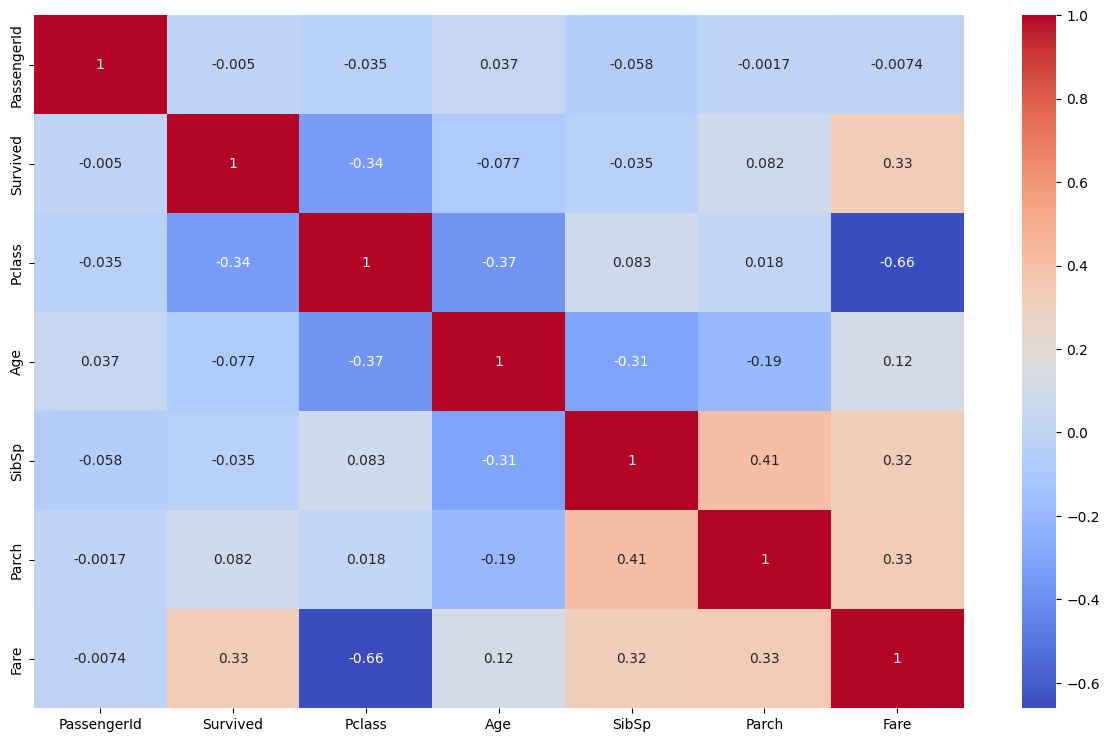

In [34]:
#Assuming 'Name' is a column containing strings, and you want to exclude it
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
subset_df = train_df[numeric_columns]

# Now compute the correlation matrix
corr_matrix = subset_df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Drop Unnecessary Columns

In [36]:
df= df.drop(['Name','Ticket'],axis=1)

In [37]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
1777,887,0,2,male,27.000000,0,0,13.0000,S
1778,888,1,1,female,19.000000,0,0,30.0000,S
1779,889,0,3,female,29.699118,1,2,23.4500,S
1780,890,1,1,male,26.000000,0,0,30.0000,C


In [38]:
df = pd.get_dummies(df,columns=['Sex', 'Embarked'],drop_first=True)

# Splitting dataset

In [39]:
train= df.iloc[:train_len:]
test= df.iloc[train_len:,:]

In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [41]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
891,1,0,3,22.0,1,0,7.2500,True,False,True
892,2,1,1,38.0,1,0,71.2833,False,False,False
893,3,1,3,26.0,0,0,7.9250,False,False,True
894,4,1,1,35.0,1,0,53.1000,False,False,True
895,5,0,3,35.0,0,0,8.0500,True,False,True


# Train-test split

In [42]:
x= df.drop(columns=['PassengerId','Survived'],axis=1)
y=train['Survived']

In [43]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [44]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [45]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,True,False,True
1,2,1,1,38.000000,1,0,71.2833,False,False,False
2,3,1,3,26.000000,0,0,7.9250,False,False,True
3,4,1,1,35.000000,1,0,53.1000,False,False,True
4,5,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
1777,887,0,2,27.000000,0,0,13.0000,True,False,True
1778,888,1,1,19.000000,0,0,30.0000,False,False,True
1779,889,0,3,29.699118,1,2,23.4500,False,False,True
1780,890,1,1,26.000000,0,0,30.0000,True,False,False


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    train.drop(['Survived','PassengerId'], axis=1),
    train['Survived'],
    test_size=0.2,
    random_state=42)


# Checking for the shape of the training features(x) in the dataset:

In [47]:
x_train.shape

(712, 8)

# Checking for the shape of the testing features(x) in the dataset:

In [48]:
x_test.shape

(179, 8)

# Checking for the shape of the testing target values(y) in the dataset:

In [49]:
y_test.shape

(179,)

## Checking for the shape of the training target values(y) in the dataset:

In [50]:
y_train.shape

(712,)

# Model Evaluation:

# 1) Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [52]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

# logistic regression model evaluation

In [53]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy= accuracy_score(y_test,y_pred)

In [54]:
print(f"Accuracy:{accuracy}")


Accuracy:0.7988826815642458


# 2) Decision tree Classification

In [55]:
from sklearn.tree import DecisionTreeClassifier
model_dtc= DecisionTreeClassifier()

In [56]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

# Decision tree model Evaluation:

In [57]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)

In [58]:
print(f"Accuracy:{accuracy}")

Accuracy:0.7988826815642458


# 3) Random Forest classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()

In [60]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

# Random Forest model evaluation

In [61]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)

In [62]:
print(f"Accuracy:{accuracy}")

Accuracy:0.7988826815642458


# Support Vector Machines (SVM):

In [63]:
from sklearn.svm import SVC

In [64]:
svm_model = SVC(kernel = 'linear')

In [65]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [67]:
y_pred_svm = svm_model.predict(x_test)

# SVM Evaluation:

In [68]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)

In [69]:
print("SVM Accuracy:",accuracy_svm)

SVM Accuracy: 0.7821229050279329


# K-Nearest Neighbors(KNN)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [72]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred_knn = knn_model.predict(x_test)

# KNN Evaluation

In [74]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [75]:
print("KNN Accuracy",accuracy_knn)

KNN Accuracy 0.6983240223463687


# XGBoost

In [76]:
!pip install xgboost

In [77]:
from xgboost import XGBClassifier

In [78]:
model_xgb = XGBClassifier()

In [80]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
y_pred = model_xgb.predict(x_test)

# Evaluation

In [82]:
accuracy = accuracy_score(y_test,y_pred)

In [84]:
print(f"Accuracy:{accuracy}")

Accuracy:0.8156424581005587


# Adaboost Classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
model_adaboost = AdaBoostClassifier()

In [89]:
model_adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [90]:
y_pred_adaboost= model_adaboost.predict(x_test)

Adaboost model evaluation

In [91]:
accuracy_adaboost = accuracy_score(y_test,y_pred_adaboost)

In [92]:
print(f"AdaBoost Accuracy:{accuracy_adaboost}")

AdaBoost Accuracy:0.8044692737430168


# Catboost Classifier

In [93]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


In [94]:
from catboost import CatBoostClassifier

In [95]:
model_catboost = CatBoostClassifier()

In [96]:
model_catboost.fit(x_train,y_train)
y_pred_catboost = model_catboost.predict(x_test)

Learning rate set to 0.008911
0:	learn: 0.6873382	total: 55.2ms	remaining: 55.1s
1:	learn: 0.6814495	total: 64.1ms	remaining: 32s
2:	learn: 0.6757707	total: 66ms	remaining: 21.9s
3:	learn: 0.6699594	total: 68.3ms	remaining: 17s
4:	learn: 0.6643071	total: 71.2ms	remaining: 14.2s
5:	learn: 0.6586778	total: 79.4ms	remaining: 13.2s
6:	learn: 0.6534965	total: 81.3ms	remaining: 11.5s
7:	learn: 0.6484308	total: 83.6ms	remaining: 10.4s
8:	learn: 0.6435631	total: 91.8ms	remaining: 10.1s
9:	learn: 0.6384417	total: 93.6ms	remaining: 9.27s
10:	learn: 0.6331897	total: 95.4ms	remaining: 8.58s
11:	learn: 0.6295968	total: 98ms	remaining: 8.07s
12:	learn: 0.6246575	total: 105ms	remaining: 7.99s
13:	learn: 0.6196201	total: 108ms	remaining: 7.61s
14:	learn: 0.6147832	total: 112ms	remaining: 7.33s
15:	learn: 0.6107804	total: 117ms	remaining: 7.19s
16:	learn: 0.6061339	total: 124ms	remaining: 7.18s
17:	learn: 0.6019731	total: 126ms	remaining: 6.88s
18:	learn: 0.5978610	total: 130ms	remaining: 6.7s
19:	lear

# Evaluation

In [97]:
accuracy_catboost = accuracy_score(y_test,y_pred_catboost)
print(f"CatBoost Accuracy:{accuracy_catboost}")

CatBoost Accuracy:0.8268156424581006
